### Import Universal Packages

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Load Data, Normalize, and Split

In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/200_Tweets_Separated_Images.csv', header=None)

data.columns = ['Date', 'ImageType', 'Sentiment', 'WordCount', 'Hashtags', 'ImageQuality', 'ImageRelevancy', 'FacePresence', 'Colorfulness', 'EngagementScore']

# Drop the 'Date' column for now, as it's not used in prediction
data = data.drop('Date', axis=1)
data = data.drop(0, axis=0)
data = data.apply(pd.to_numeric, errors='coerce')
data_copy = data.copy()

# Assign unique labels to every row
# data['UniqueLabel'] = range(len(data))

display(data)
print(data.info())
# Split the data into features (X) and target variable (y)
X = data.iloc[:, 1:9]  # Features (columns 2-9)
y = data['EngagementScore']  # Target variable (column 10)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

,ImageType,Sentiment,WordCount,Hashtags,ImageQuality,ImageRelevancy,FacePresence,Colorfulness,EngagementScore
1,0,0,16,5,1,1,-1,7.840725,10.53
2,0,1,17,4,1,1,-1,11.375263,10.34
3,1,0,2,9,1,1,-1,11.805964,10.08
4,0,0,3,7,1,-1,-1,10.789090,10.00
5,0,0,5,19,1,1,1,0.000000,9.38
...,...,...,...,...,...,...,...,...,...
274,0,1,8,3,1,1,-1,3.995602,2.17
275,0,0,0,16,1,1,-1,17.008901,2.17
276,0,1,37,6,1,1,-1,10.267390,2.17
277,-1,0,26,6,0,0,0,0.000000,3.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 1 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ImageType        278 non-null    int64  
 1   Sentiment        278 non-null    int64  
 2   WordCount        278 non-null    int64  
 3   Hashtags         278 non-null    int64  
 4   ImageQuality     278 non-null    int64  
 5   ImageRelevancy   278 non-null    int64  
 6   FacePresence     278 non-null    int64  
 7   Colorfulness     278 non-null    float64
 8   EngagementScore  278 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 19.7 KB
None


### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, predictions_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')

# Now you can use the trained linear regression model to make predictions for new data
# For example, if you have a new tweet data in a variable named 'new_tweet'
# new_tweet_normalized = scaler.transform(new_tweet.iloc[:, 1:9])
# new_engagement_score_lr = model_lr.predict(new_tweet_normalized)'''


Linear Regression Mean Squared Error: 3.0497926067919473e-30


### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
model_rf = RandomForestRegressor()

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Random Forest Mean Squared Error: {mse}')

# Now you can use the trained model to make predictions for new data
# For example, if you have a new tweet data in a variable named 'new_tweet'
# new_tweet_normalized = scaler.transform(new_tweet.iloc[:, 1:9])
# new_engagement_score = model.predict(new_tweet_normalized)

Random Forest Mean Squared Error: 0.006783331785714471


### SVM Model

In [ ]:
from sklearn.svm import SVR

# Create an SVM Regression model
model_svm = SVR()

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions on the test set
predictions_svm = model_svm.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, predictions_svm)
print(f'SVM Regression Mean Squared Error: {mse_svm}')

SVM Regression Mean Squared Error: 0.06962761754728827


### Plotting Correlations

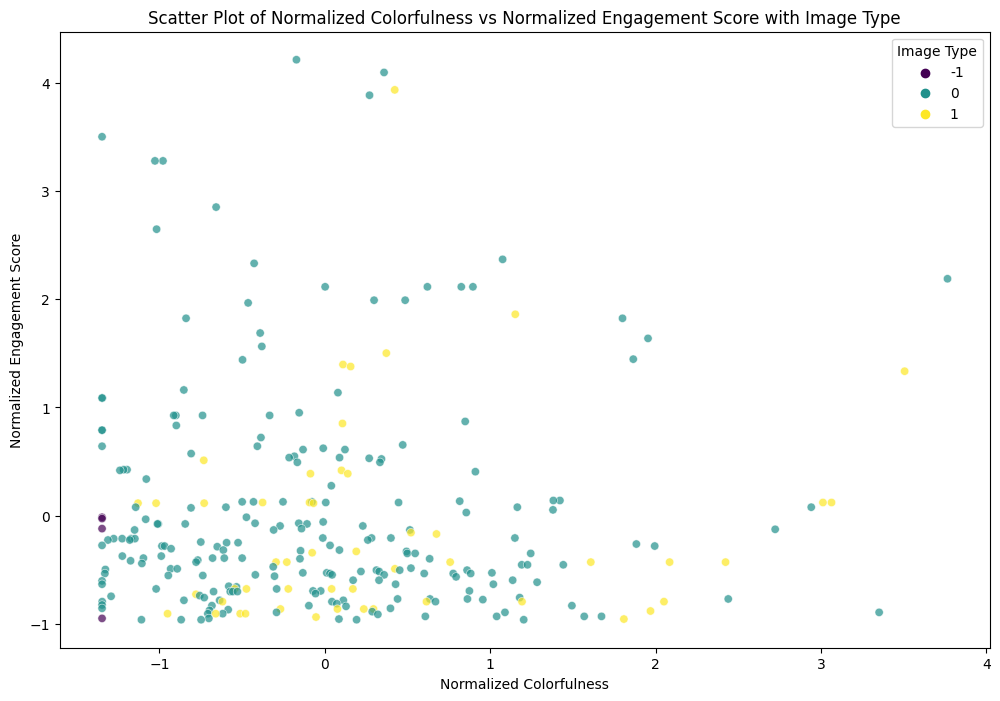

In [ ]:
# Normalize Colorfulness and Engagement Score using StandardScaler
scaler = StandardScaler()
data_copy['NormalizedColorfulness'] = scaler.fit_transform(data_copy['Colorfulness'].values.reshape(-1, 1))
data_copy['NormalizedEngagementScore'] = scaler.fit_transform(data_copy['EngagementScore'].values.reshape(-1, 1))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='NormalizedColorfulness', y='NormalizedEngagementScore', hue='ImageType', data=data_copy, palette='viridis', alpha=0.7)
plt.xlabel('Normalized Colorfulness')
plt.ylabel('Normalized Engagement Score')
plt.title('Scatter Plot of Normalized Colorfulness vs Normalized Engagement Score with Image Type')
plt.legend(title='Image Type')
plt.savefig('color_v_engage.png')
plt.show()


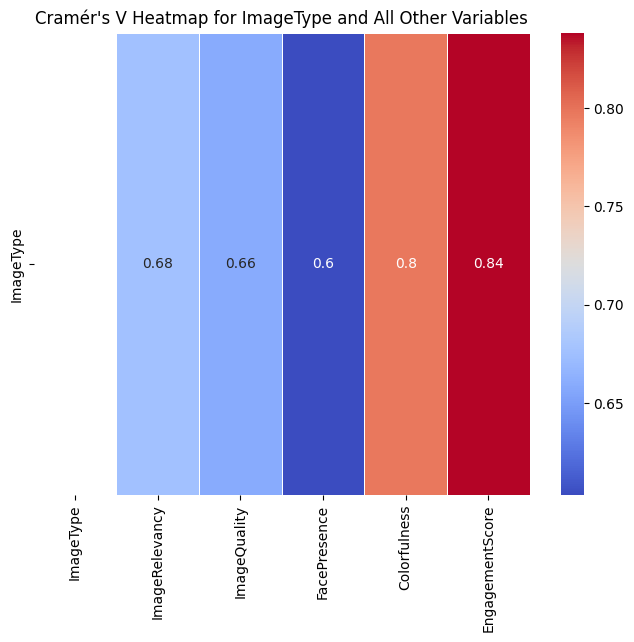

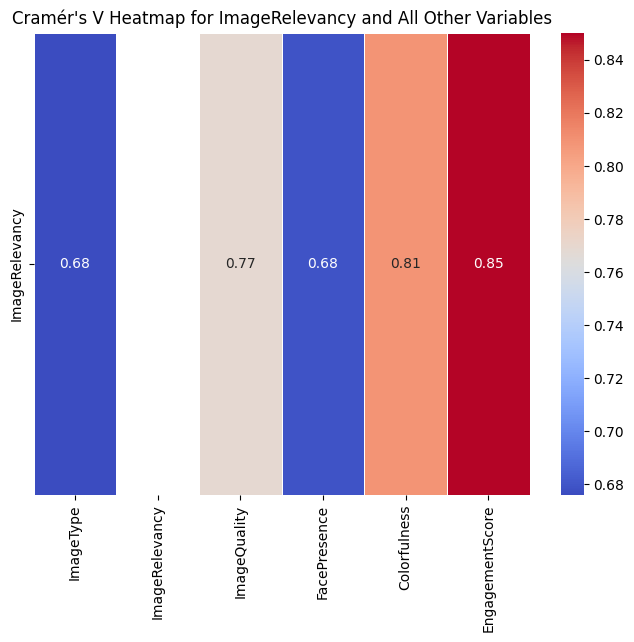

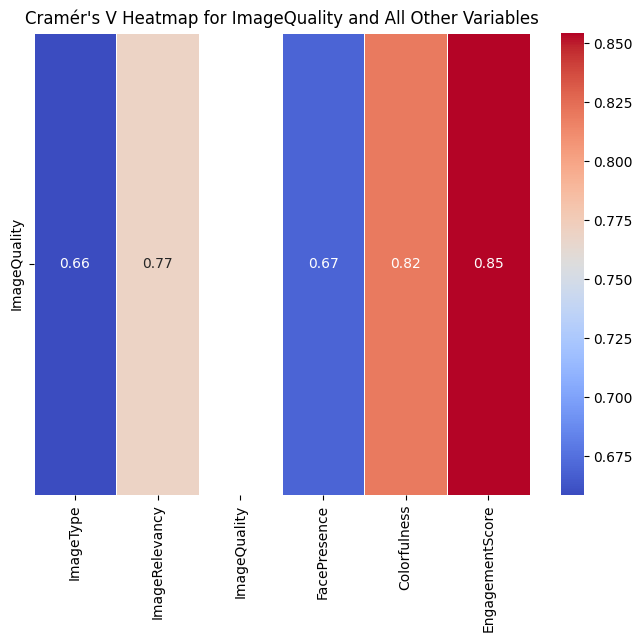

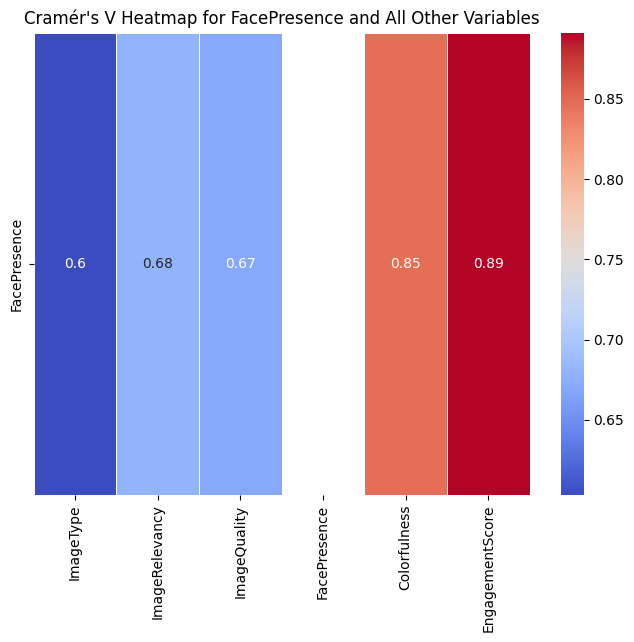

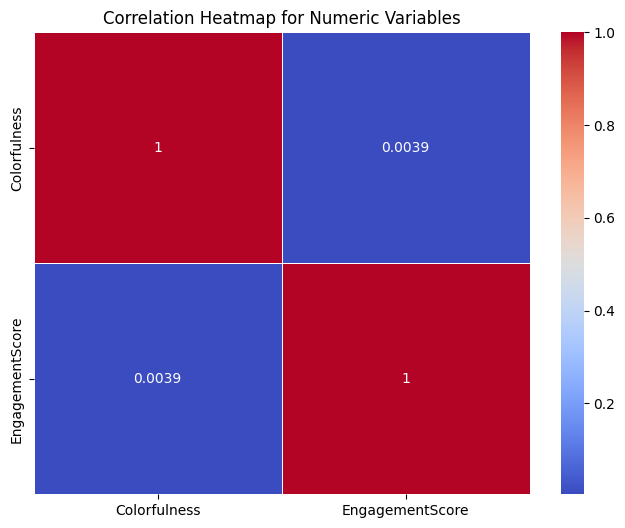

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Assuming your DataFrame copy is named 'data_copy' and contains relevant columns
# Replace 'data_copy' with the actual name of your DataFrame copy

# Select relevant columns for the analysis
all_columns = ['ImageType', 'ImageRelevancy', 'ImageQuality', 'FacePresence', 'Colorfulness', 'EngagementScore']

# Create a subset of the data with selected columns
selected_data = data_copy[all_columns]

# Separate numeric and categorical variables
numeric_columns = ['Colorfulness', 'EngagementScore']
categorical_columns = ['ImageType', 'ImageRelevancy', 'ImageQuality', 'FacePresence']

# Create separate heatmaps for each categorical variable
for categorical_column in categorical_columns:
    # Calculate Cramér's V for the pair of categorical variable and all other variables
    cramer_v_matrix = pd.DataFrame(index=[categorical_column], columns=all_columns)

    for other_column in all_columns:
        if other_column != categorical_column:
            contingency_table = pd.crosstab(selected_data[categorical_column], selected_data[other_column])
            chi2, _, _, _ = stats.chi2_contingency(contingency_table)
            n = len(data_copy)
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            cramer_v_matrix.at[categorical_column, other_column] = float(cramers_v)

    cramer_v_matrix = cramer_v_matrix.astype(float)
    # Create a heatmap for Cramér's V
    plt.figure(figsize=(8, 6))
    sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Cramér\'s V Heatmap for {categorical_column} and All Other Variables')
    plt.savefig(f'cramers_v_heat_{categorical_column.lower()}.png')
    plt.show()

# Create a heatmap for the correlation matrix of numeric variables
numeric_corr_matrix = selected_data[numeric_columns].corr()

# Create a heatmap for the correlation matrix of numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numeric Variables')
plt.savefig('correlation_heat_color_engage.png')
plt.show()


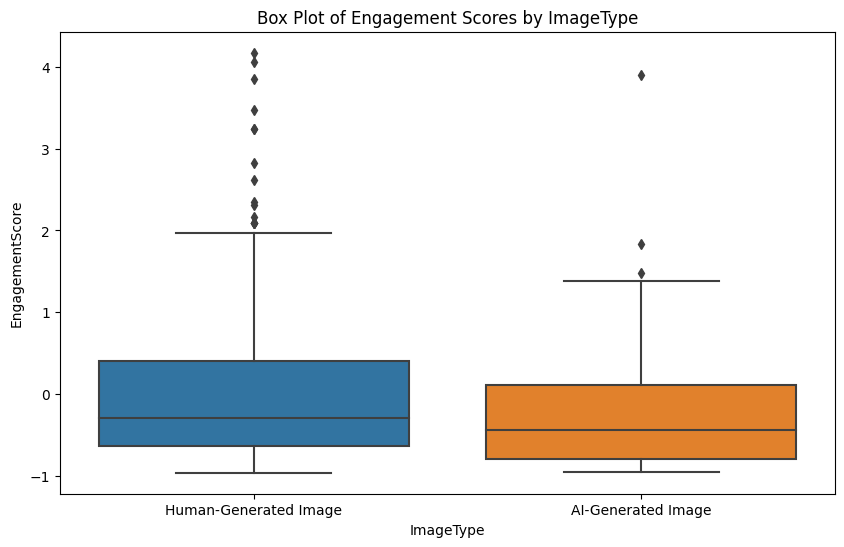

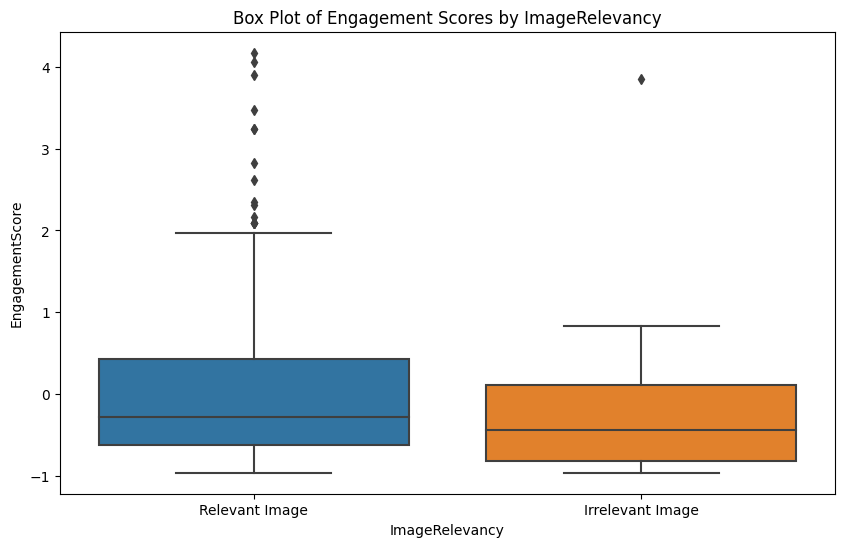

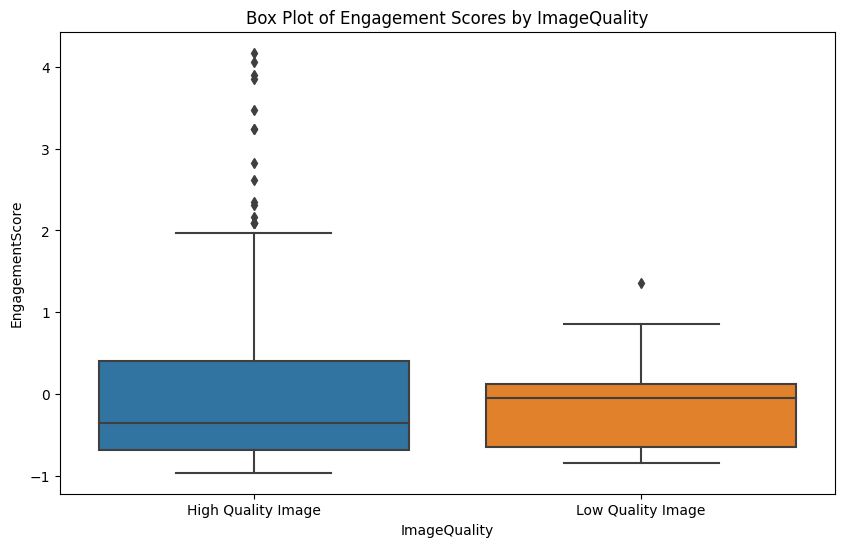

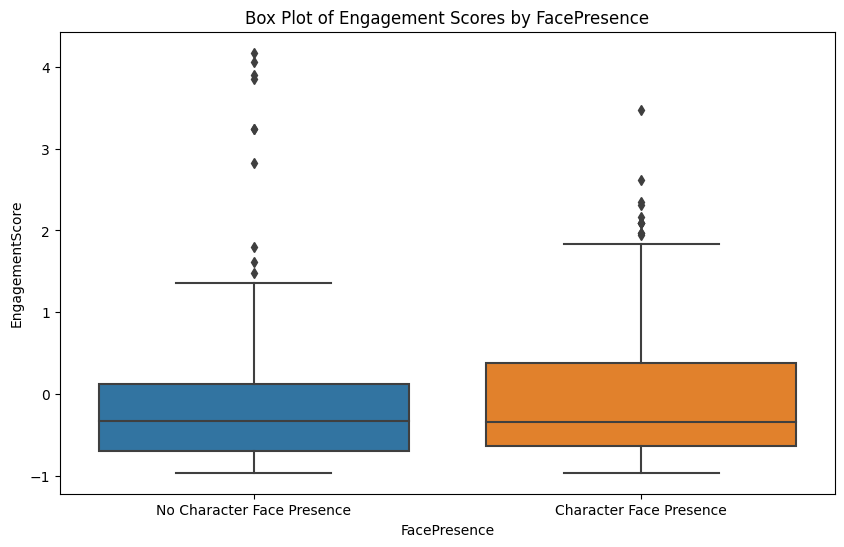

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame copy is named 'data_copy' and contains relevant columns
# Replace 'data_copy' with the actual name of your DataFrame copy

# Select relevant columns
all_columns = ['ImageType', 'ImageRelevancy', 'ImageQuality', 'FacePresence', 'EngagementScore']

# Create a subset of the data with selected columns
subset_data = data_copy[all_columns]

# Custom labels for categorical variables
label_mapping = {
    'ImageType': {-1: 'No Image', 0: 'Human-Generated Image', 1: 'AI-Generated Image'},
    'ImageRelevancy': {-1: 'Irrelevant Image', 1: 'Relevant Image'},
    'ImageQuality': {-1: 'Low Quality Image', 1: 'High Quality Image'},
    'FacePresence': {-1: 'No Character Face Presence', 1: 'Character Face Presence'}
}

# Exclude rows with 0 in 'ImageRelevancy' and 'FacePresence'
subset_data = subset_data[subset_data['ImageRelevancy'] != 0]
subset_data = subset_data[subset_data['FacePresence'] != 0]

# Standardize the numeric columns (if needed)
numeric_columns = ['EngagementScore']
scaler = StandardScaler()
subset_data[numeric_columns] = scaler.fit_transform(subset_data[numeric_columns])

subset_data['ImageType'] = subset_data['ImageType'].map(label_mapping['ImageType'])


# Create box plot for 'ImageType' with explicit order
plt.figure(figsize=(10, 6))
sns.boxplot(x='ImageType', y='EngagementScore', data=subset_data)
plt.title('Box Plot of Engagement Scores by ImageType')
plt.savefig('boxplot_image_type.png')  # Save the figure
plt.show()

# Create box plots for other categorical variables
for categorical_column in all_columns[1:-1]:  # Exclude the first (ImageType) and last column (EngagementScore)
    # Apply custom labels
    subset_data[categorical_column] = subset_data[categorical_column].map(label_mapping[categorical_column])

    # Create a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_column, y='EngagementScore', data=subset_data)
    plt.title(f'Box Plot of Engagement Scores by {categorical_column}')
    plt.savefig(f'boxplot_{categorical_column.lower()}.png')  # Save the figure
    plt.show()
